# Aidan's Work for Airline Reviews

## Data Processing

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("./Airlines Reviews and Rating.csv")
df.head(3)

,Aircraft Type,Users Reviews,Country,Type_of_Travellers,Route,Seat_Types,Seat Comfort,Date Flown,Cabin Staff Service,Ground Service,Food & Beverages,Wifi & Connectivity,Inflight Entertainment,Value For Money,Recommended
0,NaN,✅Trip Verified| Cancelled our flight last-min...,United Kingdom,Couple Leisure,London Heathrow to Tokyo,Economy Class,1.0,Sep-23,1.0,2.0,1.0,NaN,3.0,1,no
1,NaN,"✅Trip Verified| I had a flight from Miami, Flo...",United States,Solo Leisure,Miami to Dublin via London Heathrow,Business Class,1.0,Aug-23,3.0,1.0,2.0,1.0,1.0,1,no
2,NaN,✅Trip Verified| We started our day with BA in...,United States,Business,Prague to San Francisco via London,Business Class,1.0,Sep-23,3.0,1.0,3.0,1.0,NaN,1,no


In [3]:
aircraft_type = np.NaN
users_review = "It was short and quick."
country = "India"
type_of_travellers = "Solo Leisure"
route = "United States to India" # Format as "[Source] to [Dest]"
seat_types = "Economy Class" # Format as "[Type] Class"
seat_comfort = 4
date_flown = "Mar-5" # Format as MMM-DD
cabin_staff_service = 4
ground_service = np.NaN
food_and_beverages = 4
wifi_and_connectivity = 3
inflight_entertainment = 4
value_for_money = 4
recommended = "yes"

attributes = [aircraft_type, users_review, country, type_of_travellers, route, seat_types, seat_comfort, date_flown, cabin_staff_service, ground_service, food_and_beverages, wifi_and_connectivity, inflight_entertainment, value_for_money, recommended]

newIndex = len(df)
df.loc[newIndex] = attributes

In [4]:
df.tail(10)

,Aircraft Type,Users Reviews,Country,Type_of_Travellers,Route,Seat_Types,Seat Comfort,Date Flown,Cabin Staff Service,Ground Service,Food & Beverages,Wifi & Connectivity,Inflight Entertainment,Value For Money,Recommended
3281,NaN,We travelled economy from Manchester to Toront...,United Kingdom,NaN,NaN,Economy Class,4.0,NaN,2.0,NaN,2.0,NaN,2.0,4,no
3282,NaN,Flight LGW to TFS in Business. Like another re...,United Kingdom,NaN,NaN,Business Class,1.0,NaN,2.0,NaN,2.0,NaN,1.0,1,no
3283,NaN,Flew LGW - MCO 26th October. Was a bit worried...,United Kingdom,NaN,NaN,Business Class,4.0,NaN,5.0,NaN,4.0,NaN,3.0,5,yes
3284,NaN,Gatwick to Marrakech and back. Bag drop was fa...,United Kingdom,NaN,NaN,Economy Class,4.0,NaN,5.0,NaN,4.0,NaN,1.0,4,yes
3285,NaN,LAX to LHR - 25 Oct 2014. I agree with other r...,United Kingdom,NaN,NaN,Business Class,3.0,NaN,2.0,NaN,1.0,NaN,3.0,2,no
3286,NaN,Toronto to London Heathrow - 26/10/14. After r...,United Kingdom,NaN,NaN,Business Class,4.0,NaN,5.0,NaN,5.0,NaN,5.0,4,yes
3287,NaN,I have after years of loyalty finally had it w...,United Kingdom,NaN,NaN,Business Class,3.0,NaN,1.0,NaN,1.0,NaN,2.0,1,no
3288,NaN,Traveled with British Airways ORD-LHR last mon...,United States,NaN,NaN,Business Class,5.0,NaN,5.0,NaN,4.0,NaN,4.0,4,yes
3289,NaN,Travelled to Palma in new BA 'sardine' busines...,United Kingdom,NaN,NaN,Business Class,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1,no
3290,NaN,It was short and quick.,India,Solo Leisure,United States to India,Economy Class,4.0,Mar-5,4.0,NaN,4.0,3.0,4.0,4,yes


In [5]:
# Categorical Types
df['Aircraft Type'] = df['Aircraft Type'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Type_of_Travellers'] = df['Type_of_Travellers'].astype('category')
df['Seat_Types'] = df['Seat_Types'].astype('category')
df['Date Flown'] = df['Date Flown'].astype('category')
df['Recommended'] = df['Recommended'].astype('category')

# These floats could be ints
df['Seat Comfort'] = df['Seat Comfort'].astype(pd.Int64Dtype())
df['Cabin Staff Service'] = df['Cabin Staff Service'].astype(pd.Int64Dtype())
df['Ground Service'] = df['Ground Service'].astype(pd.Int64Dtype())
df['Wifi & Connectivity'] = df['Wifi & Connectivity'].astype(pd.Int64Dtype())
df['Food & Beverages'] = df['Food & Beverages'].astype(pd.Int64Dtype())
df['Inflight Entertainment'] = df['Inflight Entertainment'].astype(pd.Int64Dtype())

In [6]:
# The route could be broken into two categories
# First fix broken entries
df.loc[df[df.Route == 'London Singapore '].index[0], 'Route'] = 'London to Singapore'
df.loc[df[df.Route == 'doha to londonDoha to London'].index[0], 'Route'] = 'Doha to London'
df.loc[df[df.Route == 'Bucharest to London Heathrow to Los Angeles'].index[0], 'Route'] = 'Bucharest to London Heathrow Los Angeles'
df.loc[df[df.Route == 'Edinburgh-Florence '].index[0], 'Route'] = 'Edinburgh to Florence'
df.loc[df[df.Route == 'YVR-LIS via LHR'].index[0], 'Route'] = 'YVR to LHR to LIS'
df.loc[df[df.Route == 'MAN-LHR '].index[0], 'Route'] = 'MAN to LHR'
df.loc[df[df.Route == 'LHR-BOM'].index[0], 'Route'] = 'LHR to DEN'
df.loc[df[df.Route == 'ORD-LHR'].index[0], 'Route'] = 'ORD to LHR'
df.loc[df[df.Route == 'LHR-DEN'].index[0], 'Route'] = 'LHR to DEN'
df.loc[df[df.Route == 'LHR-GLA'].index[0], 'Route'] = 'LHR to GLA'
df.loc[df[df.Route == 'GLA-LHR'].index[0], 'Route'] = 'GLA to LHR'
df.loc[df[df.Route == 'FRA-LHR '].index[0], 'Route'] = 'FRA to LHR'
df.loc[df[df.Route == 'London-Vancouver return'].index[0], 'Route'] = 'London to Vancouver'
df.loc[df[df.Route == 'LHR-ORD'].index[0], 'Route'] = 'LHR to ORD'
df.loc[df[df.Route == 'BOM-LHR'].index[0], 'Route'] = 'BOM to LHR'
df.loc[df[df.Route == 'LHR-BOM'].index[0], 'Route'] = 'LHR to BOM'

In [7]:
df['Route'].apply(lambda x: x.split(' to ') if type(x) is str else x)
countries = df['Route'].apply(lambda x: x.split(' to ') if type(x) is str else x)
countries = countries.apply(lambda x: [x[0], x[1].split('via')[1], x[1].split('via')[0]] if (type(x) is list and x[1].find('via') != -1) else x)
max_countries = countries.apply(lambda x: len(x) if (type(x) is list) else 0).max()

In [8]:
for i in range(max_countries):
    df['country_' + str(i)] = countries.apply(lambda x: x[i] if (type(x) is list and (len(x)) > i) else np.nan)

df = df.drop('Route', axis=1)
df['country_0'] = df['country_0'].astype('category')
df['country_1'] = df['country_1'].astype('category')
df['country_2'] = df['country_2'].astype('category')
df['country_3'] = df['country_3'].astype('category')

In [9]:
df.dtypes

Aircraft Type             category
Users Reviews               object
Country                   category
Type_of_Travellers        category
Seat_Types                category
Seat Comfort                 Int64
Date Flown                category
Cabin Staff Service          Int64
Ground Service               Int64
Food & Beverages             Int64
Wifi & Connectivity          Int64
Inflight Entertainment       Int64
Value For Money              int64
Recommended               category
country_0                 category
country_1                 category
country_2                 category
country_3                 category
dtype: object

## Word Processing

In [10]:
X_reviews = df['Users Reviews']
X_reviews = X_reviews.apply(lambda x: list(set(x.lower().split())))


allWords = set()

pattern = re.compile('\W')

for review in X_reviews:
    for word in review:
        cleanWord = re.sub(pattern, '', word)
        allWords.add(cleanWord)

allWords.discard('')
print(len(allWords))

14709


In [11]:
wordSeries = dict()

for word in allWords:
    wordSeries.update({word:pd.Series(data=False, index=X_reviews.index, name=word)})

for i in X_reviews.index:
    review = X_reviews.iloc[i]
    for word in review:
        cleanWord = re.sub(pattern, '', word)
        if (cleanWord != ''):
            wordSeries[cleanWord][i] = True

X_words = pd.concat(wordSeries.values(), axis=1)

In [12]:
y = df.Recommended

df_words = pd.concat([X_words, y], axis=1)

df_words

,lhrman,lhrsin,income,software,25th,obvioulsy,referred,lateness,liners,lhrgva,...,exist,forgive,divert,legally,news,unboarded,prospect,sauces,too,Recommended
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,no
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,no
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,no
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,no
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,yes
3287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,no
3288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,yes
3289,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,no


## Prediction based on tuned tree

In [13]:
X_words = df_words.drop('Recommended', axis=1)
X_num = df.select_dtypes(include='number')
X_cat = df.select_dtypes(include='category').apply(lambda x: x.cat.add_categories("None")).drop('Recommended', axis=1)
X_cat = X_cat.fillna("None")
X_cat = pd.get_dummies(X_cat)

X_num = X_num.fillna(-1)

df_full = pd.concat([X_words, X_num, X_cat, df.Recommended], axis=1)

In [14]:
df_full_train = df_full.drop(newIndex)
df_full_test = df_full.loc[[newIndex]]

In [15]:
X_full_train = df_full_train.drop('Recommended', axis=1)
X_full_test = df_full_test.drop('Recommended', axis=1)

y_full_train = df_full_train.Recommended
y_full_test = df_full_test.Recommended

stnd = StandardScaler().set_output(transform='pandas')
X_train_num = X_full_train.select_dtypes(include='number')
X_test_num = X_full_test.select_dtypes(include='number')

X_train_num = stnd.fit_transform(X_train_num)
X_test_num = stnd.transform(X_test_num)

X_full_train = pd.concat([X_train_num, X_full_train.select_dtypes(exclude='number')], axis=1)
X_full_test = pd.concat([X_test_num, X_full_test.select_dtypes(exclude='number')], axis=1)

## Use L1 logistic regression to select the most useful features

In [16]:
lr = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, verbose=1)
# grid = {}
# lrCV = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1,return_train_score=True)
lr.fit(X_full_train, y_full_train)
lr.score(X_full_train, y_full_train)

[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 4
iter   6  #CD cycles 1
iter   7  #CD cycles 5
iter   8  #CD cycles 1
iter   9  #CD cycles 10
iter  10  #CD cycles 1
iter  11  #CD cycles 21
iter  12  #CD cycles 1
optimization finished, #iter = 12
Objective value = 334.600870
#nonzeros/#features = 469/16143


0.9930091185410335

<Axes: xlabel='Feature Name'>

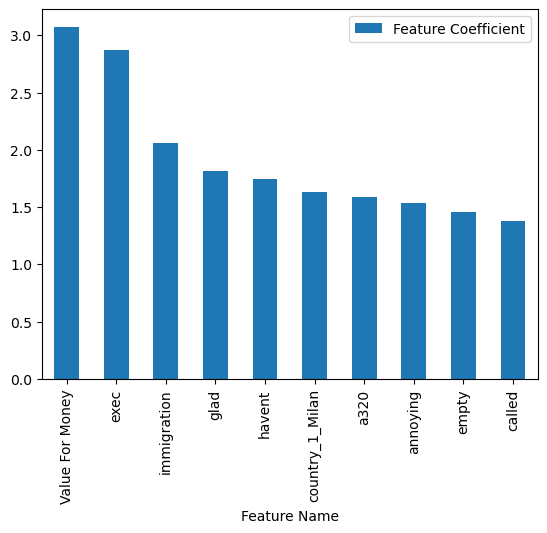

In [17]:
feature_importances = pd.DataFrame()
feature_importances['Feature Coefficient'] = lr.coef_[0]
feature_importances['Feature Name'] = lr.feature_names_in_
feature_importances.sort_values('Feature Coefficient', ascending=False).head(10).plot.bar(x='Feature Name', y='Feature Coefficient')

<Axes: xlabel='Feature Name'>

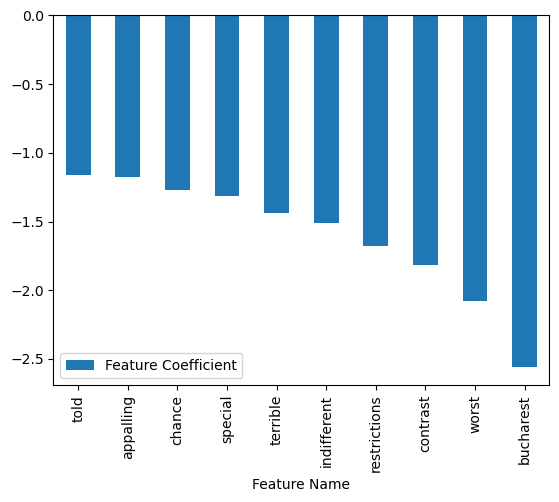

In [18]:
feature_importances.sort_values('Feature Coefficient', ascending=False).tail(10).plot.bar(x='Feature Name', y='Feature Coefficient')

In [19]:
significant_features = feature_importances[feature_importances['Feature Coefficient'] != 0]['Feature Name']

In [20]:
X_train_significant = X_full_train[significant_features]
X_test_signficant = X_full_test[significant_features]

### Random Forest (tuned hyperparameters and feature reduction)

In [21]:
forest = RandomForestClassifier(n_estimators=525)
forest.fit(X_train_significant, y_full_train)

RandomForestClassifier(n_estimators=525)

<Axes: xlabel='Feature Name'>

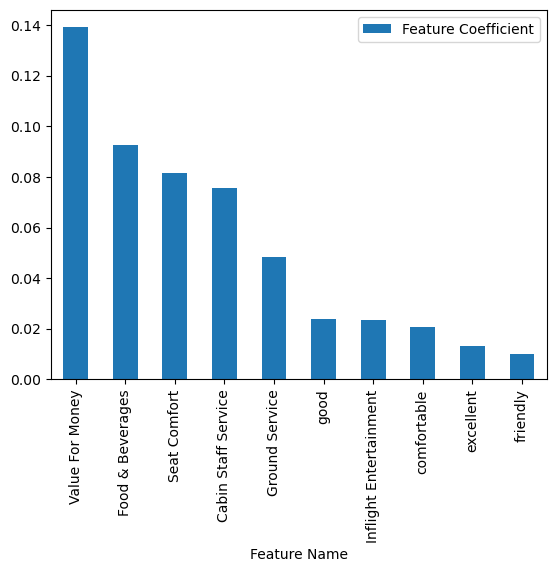

In [22]:
feature_importances = pd.DataFrame()
feature_importances['Feature Coefficient'] = forest.feature_importances_
feature_importances['Feature Name'] = forest.feature_names_in_
feature_importances.sort_values('Feature Coefficient', ascending=False).head(10).plot.bar(x='Feature Name', y='Feature Coefficient')

In [23]:
print("Random Forest Correctness:", round(forest.score(X_test_signficant, y_full_test), 3))

Random Forest Correctness: 1.0


In [24]:
print("Random Forest Prediction:",forest.predict(X_test_signficant))

Random Forest Prediction: ['yes']
